# Netflix - Data Exploration and Visualisation

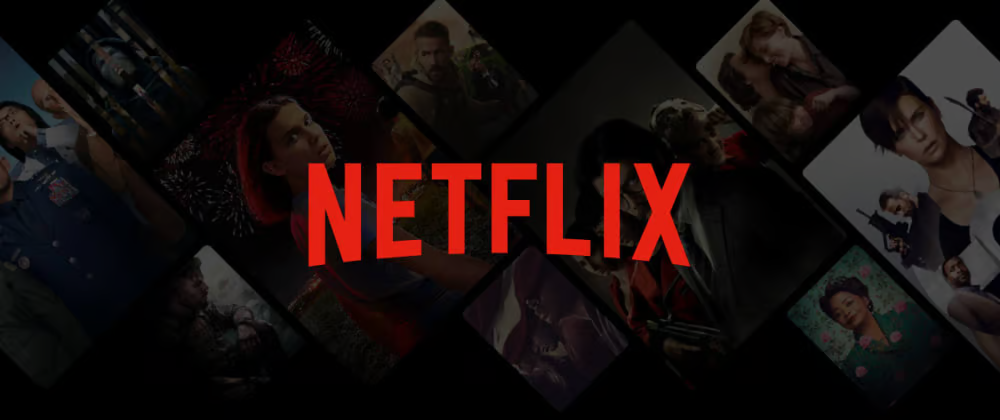

## Defining Problem Statement and Analysing basic metrics

The aim of this case study is to determine which type of shows/movies to produce and how to grow the business for Netflix in different countries by analysing the dataset provided.
To analyse the above metric we need to perform a proxy analysis on the count of movies/tv shows available for each genre which in return would tell the popularity of the same.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['duration_num'] = df['duration'].str.extract('(\d+)', expand=False).astype(float)
df = df.drop('duration', axis=1)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
 11  duration_num  8804 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [6]:
missing_values = df.isnull().sum()

print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
listed_in          0
description        0
duration_num       3
dtype: int64


In [7]:
df_movie = df[df["type"] == "Movie"]
df_movie.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,6131,6131,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,6131,1,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,6131,6131,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5943,4354,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,5656,5445,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,5691,651,United States,2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,6131,NaN,NaN,NaN,2019-05-07 03:32:47.639863040,2008-01-01 00:00:00,2018-04-01 00:00:00,2019-06-19 00:00:00,2020-07-23 12:00:00,2021-09-25 00:00:00,NaN
release_year,6131.0,NaN,NaN,NaN,2013.121514,1942.0,2012.0,2016.0,2018.0,2021.0,9.678169
rating,6129,17,TV-MA,2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,6131,278,"Dramas, International Movies",362,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_tv = df[df["type"] == "TV Show"]
df_tv.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
show_id,2676,2676,s2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,2676,1,TV Show,2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,2676,2676,Blood & Water,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,230,222,Alastair Fothergill,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,2326,2283,David Attenborough,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,2285,196,United States,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,2666,NaN,NaN,NaN,2019-06-09 11:31:22.370592768,2008-02-04 00:00:00,2018-04-21 18:00:00,2019-08-16 00:00:00,2020-10-01 00:00:00,2021-09-24 00:00:00,NaN
release_year,2676.0,NaN,NaN,NaN,2016.605755,1925.0,2016.0,2018.0,2020.0,2021.0,5.740138
rating,2674,9,TV-MA,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,2676,236,Kids' TV,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Non-Graphical Analysis: Value counts and unique attributes ​​

In [9]:
# From the analysis performed, it can be inferred that the Netflix users prefer to watch more movies than TV shows on Netflix.
df["type"].value_counts(normalize=True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [10]:
new_df = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
df_new = df.drop('listed_in', axis=1).join(new_df)

In [11]:
# Titles belonging to the International Movies and Dramas genre are generally found to be very popular among the audience
df_new.groupby("genre")["type"].value_counts().sort_values(ascending = False)

genre                         type   
International Movies          Movie      2752
Dramas                        Movie      2427
Comedies                      Movie      1674
International TV Shows        TV Show    1351
Documentaries                 Movie       869
Action & Adventure            Movie       859
TV Dramas                     TV Show     763
Independent Movies            Movie       756
Children & Family Movies      Movie       641
Romantic Movies               Movie       616
TV Comedies                   TV Show     581
Thrillers                     Movie       577
Crime TV Shows                TV Show     470
Kids' TV                      TV Show     451
Docuseries                    TV Show     395
Music & Musicals              Movie       375
Romantic TV Shows             TV Show     370
Horror Movies                 Movie       357
Stand-Up Comedy               Movie       343
Reality TV                    TV Show     255
British TV Shows              TV Show     

In [12]:
# On further analysis it can be observed that titles belonging to the Comedy genre are also found to be very popular among the audience
x = df_new[df_new['genre'].isin(['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'])]
len(x)

2654

In [13]:
df_movie = df_new[df_new["type"] == "Movie"]

In [14]:
# Popularity Analysis for Movies - It can be observed that titles belonging to International Movies, Dramas and Comedy genre are generally found to be very popular among the audience
mov_cnt = df_movie.groupby("genre")["type"].value_counts()
mov_cnt.sort_values(ascending = False)

genre                     type 
International Movies      Movie    2752
Dramas                    Movie    2427
Comedies                  Movie    1674
Documentaries             Movie     869
Action & Adventure        Movie     859
Independent Movies        Movie     756
Children & Family Movies  Movie     641
Romantic Movies           Movie     616
Thrillers                 Movie     577
Music & Musicals          Movie     375
Horror Movies             Movie     357
Stand-Up Comedy           Movie     343
Sci-Fi & Fantasy          Movie     243
Sports Movies             Movie     219
Classic Movies            Movie     116
LGBTQ Movies              Movie     102
Cult Movies               Movie      71
Anime Features            Movie      71
Faith & Spirituality      Movie      65
Movies                    Movie      57
Name: count, dtype: int64

In [15]:
df_tv = df_new[df_new["type"] == "TV Show"]

In [16]:
# Popularity Analysis for TV Shows - It can be observed that titles belonging to International TV, Dramas and TV Comedy genre are generally found to be very popular among the audience
tv_cnt = df_tv.groupby("genre")["type"].value_counts()
tv_cnt.sort_values(ascending = False)

genre                         type   
International TV Shows        TV Show    1351
TV Dramas                     TV Show     763
TV Comedies                   TV Show     581
Crime TV Shows                TV Show     470
Kids' TV                      TV Show     451
Docuseries                    TV Show     395
Romantic TV Shows             TV Show     370
Reality TV                    TV Show     255
British TV Shows              TV Show     253
Anime Series                  TV Show     176
Spanish-Language TV Shows     TV Show     174
TV Action & Adventure         TV Show     168
Korean TV Shows               TV Show     151
TV Mysteries                  TV Show      98
Science & Nature TV           TV Show      92
TV Sci-Fi & Fantasy           TV Show      84
TV Horror                     TV Show      75
Teen TV Shows                 TV Show      69
TV Thrillers                  TV Show      57
Stand-Up Comedy & Talk Shows  TV Show      56
Classic & Cult TV             TV Show     

In [17]:
newdf = df['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('ndirector')
dfnew = df.drop('director', axis=1).join(newdf)

In [18]:
# Popularity Analysis for Movies - It can be observed that the top 5 very popular director among the audience are Rajiv, Jan, Raúl, Suhas and Marcus
dfnew[dfnew["type"] == "Movie"]["ndirector"].value_counts()

ndirector
Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Name: count, Length: 4777, dtype: int64

In [19]:
# Popularity Analysis for TV Show - It can be observed that there is no correlation between TV Shows and the popularity of a Director
dfnew[dfnew["type"] == "TV Show"]["ndirector"].value_counts()

ndirector
Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
                        ..
Jesse Vile               1
Ellena Wood              1
Picky Talarico           1
Pedro Waddington         1
Michael Cumming          1
Name: count, Length: 299, dtype: int64

In [20]:
# Most of the content available to watch are rated as TV-MA and TV-14
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [21]:
# Most of the Movie available to watch are rated as TV-MA and TV-14
df_movie1 = df[df["type"] == "Movie"]
df_movie1["rating"].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [22]:
# Most of the TV Show available to watch are rated as TV-MA and TV-14
df_tv1 = df[df["type"] == "TV Show"]
df_tv1["rating"].value_counts()

rating
TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: count, dtype: int64

In [23]:
ndf = df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('ncountry')
dfn = df.drop('country', axis=1).join(ndf)

In [24]:
# It can be observed that the top 3 very popular country in which the movies are produced among the audience are United States, India and United Kingdom
dfn[dfn["type"] == "Movie"]["ncountry"].value_counts()

ncountry
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
                  ... 
Bermuda              1
Angola               1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 122, dtype: int64

In [25]:
# It can be observed that the top 5 very popular country in which the TV Shows are produced among the audience are United States, United Kingdom, Japan, South Korea and Canada
dfn[dfn["type"] == "TV Show"]["ncountry"].value_counts()

ncountry
United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Belarus                   1
United Arab Emirates      1
Uruguay                   1
Switzerland               1
Name: count, Length: 66, dtype: int64

## Visual Analysis - Univariate, Bivariate after pre-processing of the data

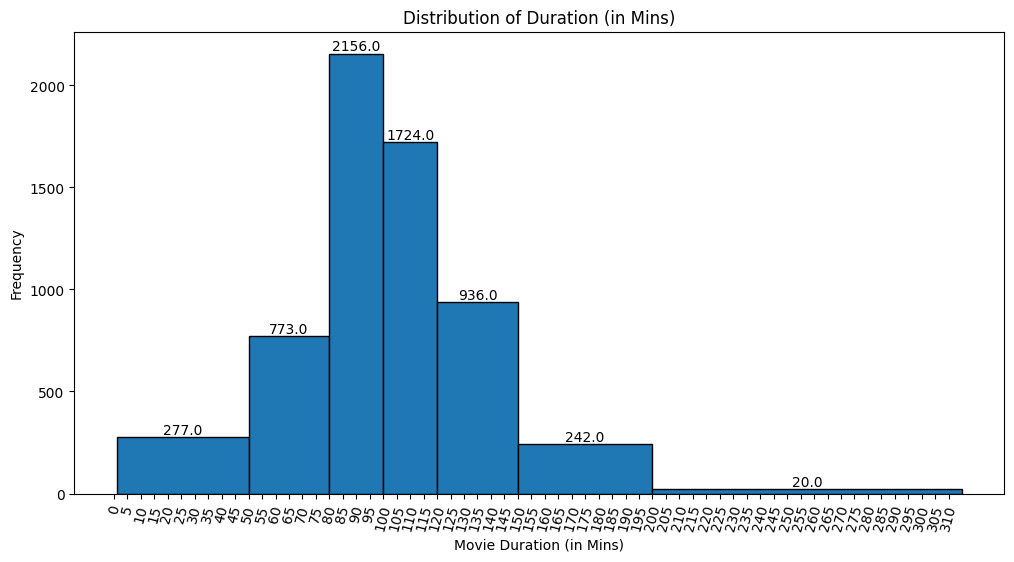

In [26]:
# It can be observed that the movies with duration between 80-120 minutes are very popular among the audience.
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 6))
plt.hist(df_movie1['duration_num'], bins = [1, 50, 80, 100, 120, 150, 200, 315], edgecolor='black')
plt.xlabel('Movie Duration (in Mins)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, max(df_movie1['duration_num'])+1, 5.0), rotation=75)
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of Duration (in Mins)')
plt.show()

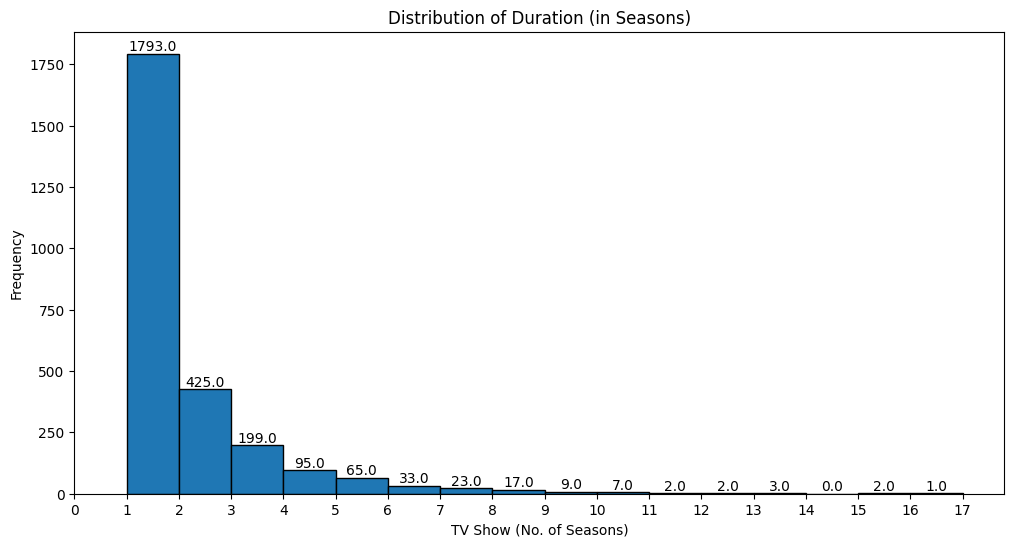

In [27]:
# It can be observed that the TV Shows with number of seasons between 1-2 are very popular among the audience.
import numpy as np
plt.figure(figsize=(12, 6))
plt.hist(df_tv1['duration_num'], bins=16, edgecolor='black')
plt.xlabel('TV Show (No. of Seasons)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, max(df_tv1['duration_num'])+1, 1.0))
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of Duration (in Seasons)')
plt.show()

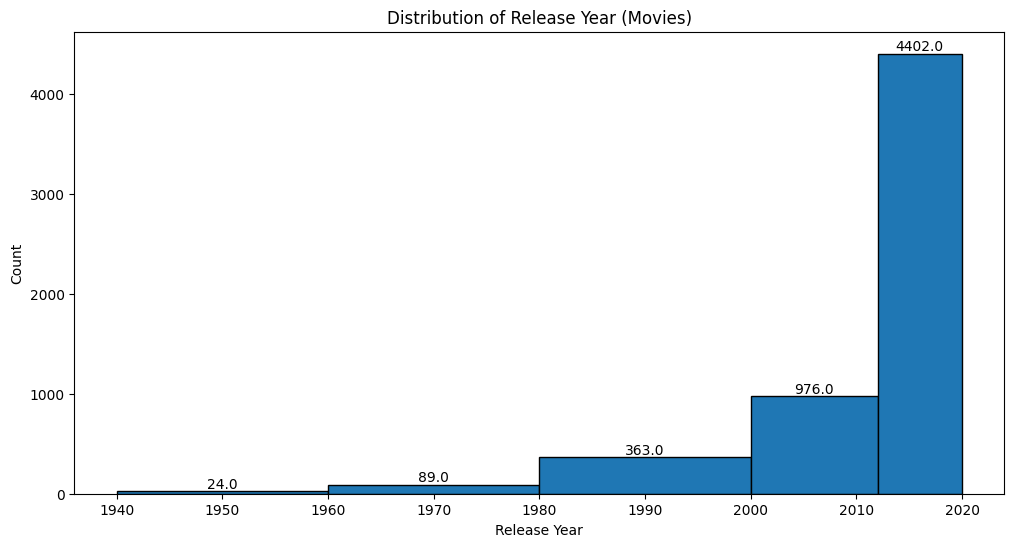

In [28]:
# It can be observed that the Movies between release year 2012-2020 are very popular among the audience.
plt.figure(figsize=(12, 6))
plt.hist(df[df["type"]=="Movie"]['release_year'], bins=[1940, 1960, 1980, 2000, 2012, 2020], edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of Release Year (Movies)')
plt.show()

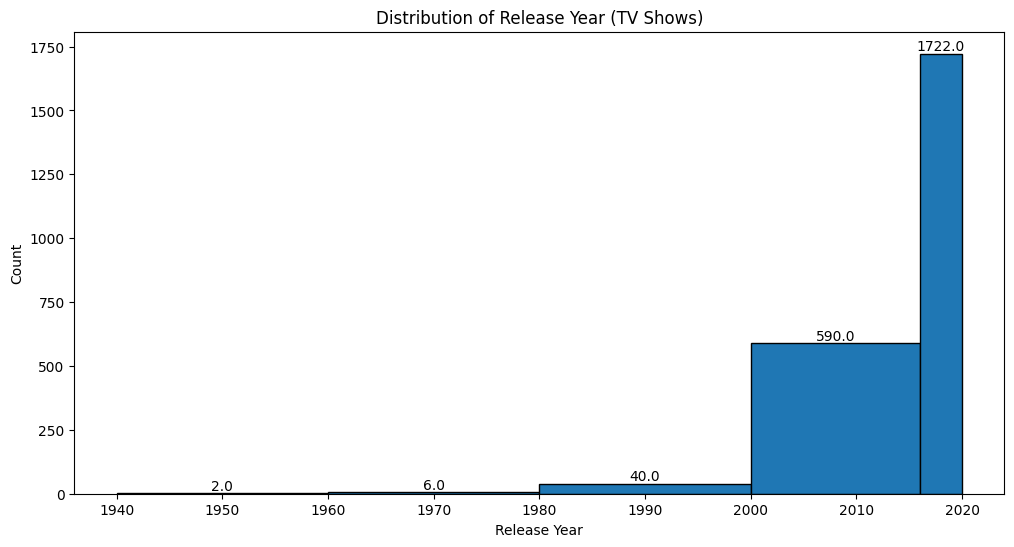

In [29]:
# It can be observed that the TV Shows between release year 2016-2020 are very popular among the audience.
plt.figure(figsize=(12, 6))
plt.hist(df[df["type"]=="TV Show"]['release_year'], bins=[1940, 1960, 1980, 2000, 2016, 2020], edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribution of Release Year (TV Shows)')
plt.show()

In [30]:
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1, index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Director'}, inplace=True)
df_new1.drop(['level_1'], axis=1, inplace=True)
df_new1.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [31]:
# unnesting the cast column - 
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2, index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Cast'}, inplace=True)
df_new2.drop(['level_1'], axis=1, inplace=True)
df_new2.head()

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [32]:
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3, index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'}, inplace=True)
df_new3.drop(['level_1'], axis=1, inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [33]:
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4, index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'Country'}, inplace=True)
df_new4.drop(['level_1'], axis=1, inplace=True)
df_new4.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [34]:
df_new5=df_new2.merge(df_new1, on=['title'], how='inner')
df_new6=df_new5.merge(df_new3, on=['title'], how='inner')
df_new=df_new6.merge(df_new4, on=['title'], how='inner')

df_new['Cast'].replace(['nan'], ['Unknown'], inplace=True)
df_new['Director'].replace(['nan'], ['Unknown'], inplace=True)
df_new['Country'].replace(['nan'], [np.nan], inplace=True)

df_new.head()

,title,Cast,Director,Genre,Country
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown,International TV Shows,South Africa


In [35]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
                          'release_year', 'rating', 'duration_num']],
                          on=['title'], how='left')
df_final

,title,Cast,Director,Genre,Country,show_id,type,date_added,release_year,rating,duration_num
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90.0
1,Blood & Water,Ama Qamata,Unknown,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
2,Blood & Water,Ama Qamata,Unknown,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
3,Blood & Water,Ama Qamata,Unknown,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
4,Blood & Water,Khosi Ngema,Unknown,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2.0
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111.0
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111.0


In [36]:
df_final.isna().sum() * 100.00 / df_final.shape[0]
df_final.dropna(subset=['duration_num', 'rating', 'release_year'], axis=0, inplace=True)
df_final['Country'].fillna(df_final['Country'].value_counts().idxmax(), inplace=True)
df_final['release_year']

0         2020
1         2021
2         2021
3         2021
4         2021
          ... 
201986    2015
201987    2015
201988    2015
201989    2015
201990    2015
Name: release_year, Length: 201921, dtype: int64

In [37]:
df_shows=df_final[df_final['type']=='TV Show']
df_movies=df_final[df_final['type']=='Movie']

In [38]:
# It can be observed that the most popular cast among the audience in Movies are Anupam Kher and Shah Rukh Khan
df_cast=df_movies.groupby(['Cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_cast=df_cast[df_cast['Cast']!='Unknown']
df_cast.head(10)

,Cast,title
2102,Anupam Kher,42
21774,Shah Rukh Khan,35
17187,Naseeruddin Shah,32
18058,Om Puri,30
638,Akshay Kumar,30
18322,Paresh Rawal,28
1311,Amitabh Bachchan,28
12026,Julie Tejwani,28
20685,Rupa Bhimani,27
3351,Boman Irani,27


In [39]:
# It can be observed that the most popular cast among the audience in TV Shows is Takahiro Sakurai
df_cast=df_shows.groupby(['Cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'], 
                                                                                      ascending=False)
df_cast=df_cast[df_cast['Cast']!='Unknown']
df_cast.head(10)

,Cast,title
13217,Takahiro Sakurai,25
14568,Yuki Kaji,19
2873,Daisuke Ono,17
6797,Junichi Suwabe,17
252,Ai Kayano,16
14552,Yuichi Nakamura,16
6754,Jun Fukuyama,15
14484,Yoshimasa Hosoya,15
3126,David Attenborough,14
5089,Hiroshi Kamiya,13


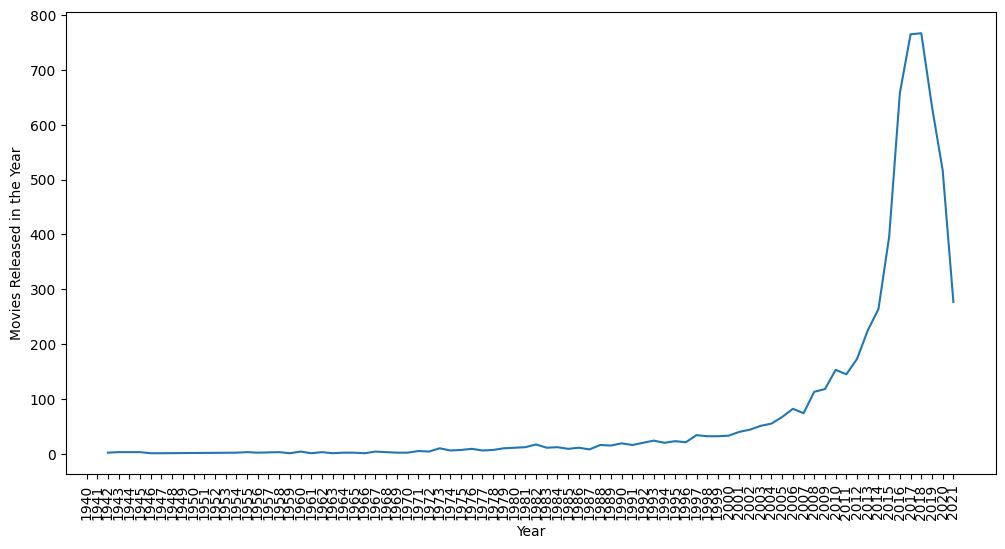

In [40]:
import seaborn as sns
# It can be observed that from 2019 afterwards the number of movies being added on Netflix started dropping drastically
df_year=df_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.xticks(np.arange(1940, max(df_tv1['release_year'])+1, 1.0), rotation = 90)
plt.show()

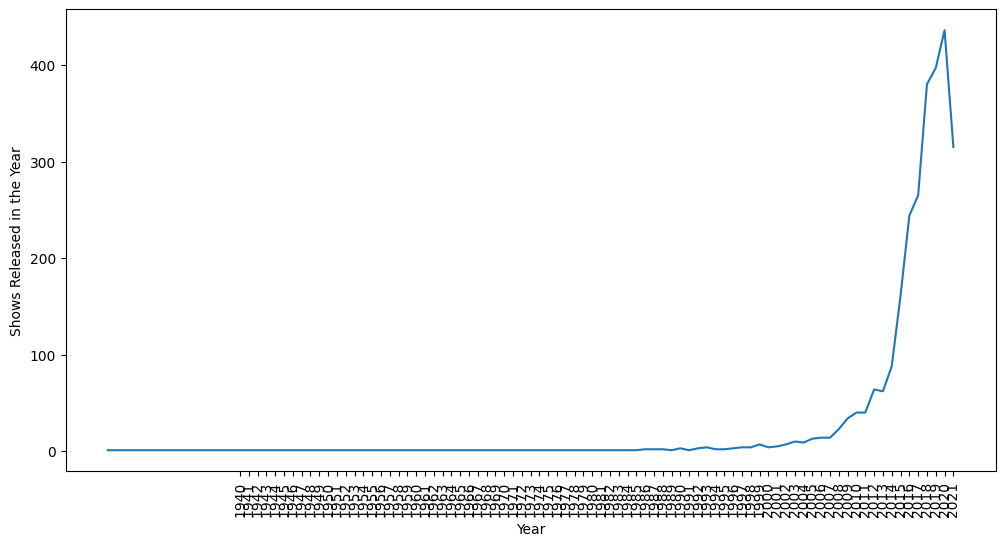

In [41]:
# It can be observed that from 2020 afterwards the number of TV Shows being added on Netflix started dropping drastically
df_year=df_shows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.xticks(np.arange(1940, max(df_tv1['release_year'])+1, 1.0), rotation = 90)
plt.show()

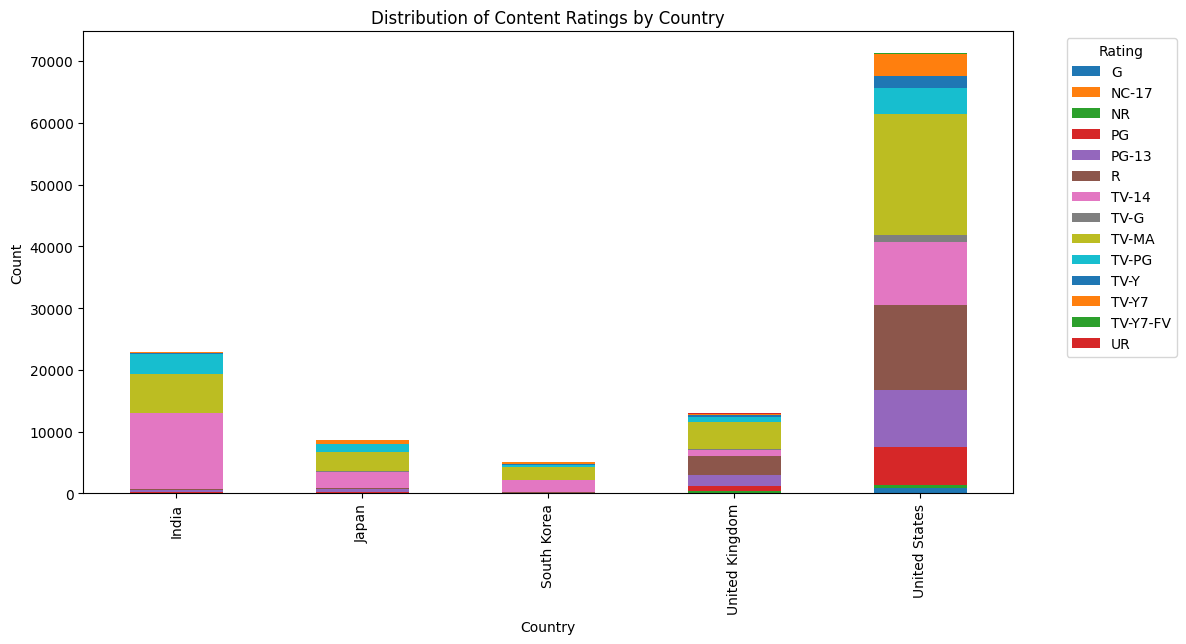

In [42]:
# It can be observed that
# TV-MA rating is extremely popular in countries United States and United Kingdom followed by rating 'R' content whereas 
# TV-MA and TV-14 are almost equally popular in countries South Korea and Japan however 
# TV-14 is extremely popular in India
countries = ['United States', 'United Kingdom', 'India', 'South Korea', 'Japan']
filtered_df = df_final[df_final['Country'].isin(countries)]
rating_counts = filtered_df.groupby(['Country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings by Country')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Based on the above analysis, here are some business insights that can be drawn:

##### Content Preference: Netflix users prefer movies over TV shows, indicating a higher demand for movies on the platform. This insight can guide content production and acquisition strategies to prioritize movie content.
##### Popular Genres: International movies and dramas, as well as comedy titles, are highly popular among the audience. Investing in content production or licensing in these genres can attract and engage a larger user base.
##### Director Influence: Some directors, such as Rajiv, Jan, Raúl, Suhas, and Marcus, have gained popularity among the audience. Collaborating with these popular directors or promoting their work can help attract and retain viewers.
##### Genre Popularity: International TV shows, dramas, and TV comedies are found to be popular among the audience. Emphasizing these genres in content selection and production can enhance user engagement and satisfaction.
##### Content Ratings: The majority of the content available on Netflix is rated as TV-MA and TV-14. This indicates that the audience prefers content with mature themes or content suitable for viewers above 14 years old. Aligning content offerings with popular ratings can cater to user preferences.
##### Country of Production: United States, India, and United Kingdom are the top countries where movies are produced, while United States, United Kingdom, Japan, South Korea, and Canada are the top countries for TV show production. Focusing on content from these countries can cater to regional preferences and diverse audience interests.
##### Duration and Seasons: Movies with a duration of 80-120 minutes and TV shows with 1-2 seasons are popular among viewers. Creating or acquiring content within these duration and season ranges can increase audience engagement.
##### Release Year: Content released between 2012-2020, especially TV shows released between 2016-2020, is highly popular. Considering the popularity of recent releases and aligning content strategies accordingly can attract more viewers.
##### Popular Cast: Anupam Kher, Shah Rukh Khan, and Takahiro Sakurai are among the most popular cast members. Leveraging the popularity of these actors in marketing campaigns and content selection can attract a larger audience.
##### Content Addition Trend: There is a noticeable drop in the number of movies added after 2019 and TV shows added after 2020. Analyzing the reasons behind this trend and adjusting content acquisition or production strategies accordingly can help maintain a diverse and up-to-date content library.
##### Rating and Country: The popularity of specific ratings varies across different countries. Tailoring content offerings based on the preferences of each country can enhance user satisfaction and engagement.

## Based on the business insights derived from the data analysis, here are some recommendations for Netflix:

##### Content Production: Increase the production of movies to meet the high demand from users. Focus on producing international movies and dramas, as well as comedy titles, as these genres are popular among the audience. Collaborate with popular directors like Rajiv, Jan, Raúl, Suhas, and Marcus to create engaging and captivating content.
##### Genre Selection: When acquiring content, prioritize international TV shows, dramas, and TV comedies, as these genres have shown high popularity among viewers. This can help attract and retain a larger audience base.
##### Content Ratings: Continue to offer a wide range of content rated as TV-MA and TV-14, as these are the most popular ratings among viewers. However, ensure a diverse selection of content across various ratings to cater to different audience preferences.
##### Regional Content Focus: Emphasize content from the United States, India, United Kingdom, Japan, South Korea, and Canada, as these countries have been identified as top producers of popular content. Invest in regional content production and acquisition strategies to cater to the specific preferences of each country.
##### Duration and Seasons: Consider producing or acquiring movies with durations between 80-120 minutes and TV shows with 1-2 seasons, as these formats have shown high popularity among viewers. This can help cater to the preferences of users who prefer shorter or limited series content.
##### Release Timing: Pay attention to recent releases, especially TV shows released between 2016-2020, as they have gained popularity.
##### Cast Promotion: Leverage the popularity of actors like Anupam Kher, Shah Rukh Khan, and Takahiro Sakurai in marketing campaigns and highlight their involvement in the content. This can attract fans of these actors and increase viewership.
##### Investigate the reasons behind the drop in the number of movies added after 2019 and TV shows added after 2020.